In [1]:
import os 
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
image = cv2.imread("Data/4/4.jpg")

In [60]:
print image.shape
#new_dims = (,b)
z = image.shape[1]

(1500, 882, 3)


In [61]:
# Trying different sizes
x1 = cv2.resize(image,(z/15,100),interpolation = cv2.INTER_AREA)
x2 = cv2.resize(image,(z/10,150),interpolation = cv2.INTER_AREA)
x3 = cv2.resize(image,(int(z/7.5),200),interpolation = cv2.INTER_AREA)
x4 = cv2.resize(image,(int(z/6),250),interpolation = cv2.INTER_AREA)
x5 = cv2.resize(image,(int(z/5),300),interpolation = cv2.INTER_AREA)
x6 = cv2.resize(image,(int(z/3),500),interpolation = cv2.INTER_AREA)

In [62]:
cv2.imshow("hey",x1)
cv2.imshow("hey2",x2)
cv2.imshow("hey3",x3)
cv2.imshow("hey4",x4)
cv2.imshow("hey5",x5)
cv2.imshow("hey6",x6)
cv2.waitKey(10)


-1

In [63]:
cv2.destroyAllWindows()

In [64]:
#


cx=x4.shape[0]/2
cy=x4.shape[1]/2
h = x4.shape[0]/4
w=x4.shape[1]/2
x4n = x4[cx-h:cx+h,cy-w:cy+w]
#x4n1 = x4[cy-w:cy+w,cx-h:cx+h]

In [65]:
print x4n.shape

(124, 146, 3)


In [66]:
cv2.imshow("he",x4n)
cv2.waitKey(10)

-1

In [67]:

# Convert to grayscale and blur 
x4g=cv2.cvtColor(x4,cv2.COLOR_BGR2GRAY)
x4gb = cv2.GaussianBlur(x4g,(3,3),0)
print x4g.shape,x4gb.shape


(250, 147) (250, 147)


In [68]:
hist = cv2.calcHist([x4gb],[0],None,[256],[0,256])
hist1 = cv2.calcHist([x4gb],[0],None,[256],[0,255])

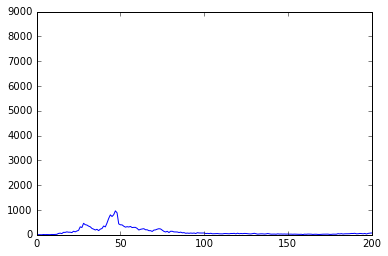

In [69]:
# plt.figure(figsize= (14,10))
# plt.subplot(2,1,1)
# cv2.imshow("h",np.hstack([x4g,x4gb]))
# cv2.waitKey(10)
plt.plot(hist)
# plt.subplot(2,2,2)
# plt.plot(hist1)
plt.xlim([0,200])
plt.show()

In [70]:
x4.shape

(250, 147, 3)

In [91]:
z = cv2.adaptiveThreshold(x4g,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,7,13)

In [93]:
cv2.imshow("hey2",z)
cv2.waitKey(10)

-1

In [94]:
xf = cv2.bitwise_and(x4g,x4g,mask = z)

In [95]:
cv2.imshow("heyd",xf)
cv2.waitKey(10)

49

In [103]:
# CANNY EDGE DETECTION
can = cv2.Canny(x4gb,50,145)
cv2.imshow("canny", can)
cv2.waitKey(1230)

13

In [101]:
cv2.destroyAllWindows()

In [ ]:
def preprocess(img):
    img = resize(img)
    img = mask(img)
    img = colors   

In [ ]:
#def masking(img):
img = cv2.resize(image,(int(z/6),250),interpolation = cv2.INTER_AREA)
print img.shape
radius  = img.shape[1]/2
center = (img.shape[0]/2,img.shape[1]/2)
canvas = np.zeros(img.shape[:2],dtype = 'uint8')
print canvas.shape
white  = (255,255,255)
cv2.circle(canvas,center,radius,white,-1)
cv2.imshow("canvas",canvas)
cv2.imshow("img",img)
cv2.waitKey(0)    
     

In [1]:
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [8]:

M = np.float32([[1, 0, 25], [0, 1, 0]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow("Shifted Down and Right", shifted)

NameError: name 'img' is not defined

In [13]:
def masking(image,mask_type = 'c'):
    #Width comes first when entering data to opencv
    cx = image.shape[1]/2
    cy = image.shape[0]/2

    center = (cx,cy)
    canvas = np.zeros(image.shape[:2],dtype = 'uint8')
    white  = (255,255,255)

    #Radius should be equal to the half the image width to get the dial
    #since our watch dials are touching the image edges

    if mask_type == 'c':
        radius  = image.shape[1]*2/3
        cv2.circle(canvas,center,radius,white,-1)

    if mask_type == 'r':
        #Since image is like a grid with top left corner as origin and width argument comes first
        #Width here is width of the entire image
       #We are going to get a rectangle which covers 2/3 of entire image size

        start_pt = (0 , cy - int(0.33*image.shape[0]))
        end_pt =  (image.shape[1],cy + int(0.33*image.shape[0]))
        cv2.rectangle(canvas,start_pt,end_pt,white,-1)
    return canvas

In [5]:

def col_hist_feat(image,mask = None,plot = False):
    bgr = cv2.split(image)
    col = ['b','g','r']
    plt.figure()
    plt.title("Flattened Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    features = []
    for (chan, color) in zip(bgr, col):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        if plot:
            plt.xlim([0, 256])
            plt.plot(hist, color = col)
        features.extend(hist)
    #return  features


In [6]:

col_hist_feat(image,,plot = True)

Error in callback <function post_execute at 0x10bde8668> (for post_execute):


ValueError: to_rgba: Invalid rgba arg "['b', 'g', 'r']"
could not convert string to float: b

ValueError: to_rgba: Invalid rgba arg "['b', 'g', 'r']"
could not convert string to float: b

In [18]:
can

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 255])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

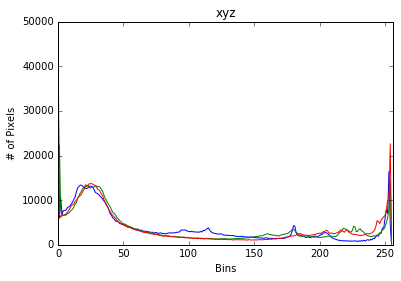

In [15]:
plot_histogram(image,"xyz")